# Flights Dataset
## by Mostafa As'ad

## Preliminary Wrangling

> This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Labels Setting function
def axes_labels(title, xlabel, ylabel): 
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

In [3]:
# Read csv file
flights = pd.read_csv('flights.csv')

In [4]:
# Peek
flights.head(5)

,MONTH,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,CANCELLED,DISTANCE,Unnamed: 16
0,1,WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,41.0,44.0,4.0,68.0,0.0,363.0,NaN
1,1,WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,0.0,13.0,8.0,0.0,0.0,363.0,NaN
2,1,WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,0.0,8.0,3.0,0.0,0.0,333.0,NaN
3,1,WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,10.0,10.0,2.0,10.0,0.0,333.0,NaN
4,1,WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,1.0,6.0,4.0,0.0,0.0,333.0,NaN


In [5]:
# Check records and variable numbers
flights.shape

(607346, 17)

In [6]:
# Contains null values ?
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              607346 non-null  int64  
 1   OP_UNIQUE_CARRIER  607346 non-null  object 
 2   ORIGIN             607346 non-null  object 
 3   ORIGIN_CITY_NAME   607346 non-null  object 
 4   ORIGIN_STATE_ABR   607346 non-null  object 
 5   ORIGIN_STATE_NM    607346 non-null  object 
 6   DEST               607346 non-null  object 
 7   DEST_CITY_NAME     607346 non-null  object 
 8   DEST_STATE_ABR     607346 non-null  object 
 9   DEST_STATE_NM      607346 non-null  object 
 10  DEP_DELAY_NEW      600647 non-null  float64
 11  TAXI_OUT           600524 non-null  float64
 12  TAXI_IN            600271 non-null  float64
 13  ARR_DELAY_NEW      599268 non-null  float64
 14  CANCELLED          607346 non-null  float64
 15  DISTANCE           607346 non-null  float64
 16  Un

In [7]:
# A weird column dropping
flights.drop(['Unnamed: 16'], axis=1, inplace= True);

In [8]:
# Dropping irrelevant columns
flights.drop(['MONTH','ORIGIN_STATE_NM', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM'], axis=1, inplace=True)
flights.shape

(607346, 9)

In [9]:
flights.head(3)

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,CANCELLED,DISTANCE
0,WN,ONT,SFO,41.0,44.0,4.0,68.0,0.0,363.0
1,WN,ONT,SFO,0.0,13.0,8.0,0.0,0.0,363.0
2,WN,ONT,SJC,0.0,8.0,3.0,0.0,0.0,333.0


In [10]:
# Have a quick look on a data summary
flights.describe()

,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,CANCELLED,DISTANCE
count,600647.000000,600524.000000,600271.000000,599268.000000,607346.000000,607346.000000
mean,9.925139,17.356615,7.503138,9.653454,0.011407,798.022341
std,42.135620,9.622261,5.670835,41.117415,0.106193,587.282639
min,0.000000,1.000000,1.000000,0.000000,0.000000,31.000000
25%,0.000000,11.000000,4.000000,0.000000,0.000000,369.000000
50%,0.000000,15.000000,6.000000,0.000000,0.000000,641.000000
75%,2.000000,20.000000,9.000000,2.000000,0.000000,1037.000000
max,2489.000000,189.000000,146.000000,2536.000000,1.000000,5095.000000


### What is the structure of your dataset?

>* 9 Variables.
>* 607346 Cleaned Record.

>**OP_UNIQUE_CARRIER:** Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.

>**ORIGIN:** Origin Airport.

>**DEST:** Destination Airport. 

>**DEP_DELAY_NEW:** Difference in minutes between scheduled and actual departure time. Early departures set to 0.

>**TAXI_OUT:** Taxi Out Time, in Minutes.

>**TAXI_IN:** Taxi In Time, in Minutes.

>**ARR_DELAY_NEW:** Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.

>**CANCELLED:** Cancelled Flight Indicator (1=Yes).

>**DISTANCE:** Distance between airports (miles).

### What is/are the main feature(s) of interest in your dataset?

>* Airlines Performances across same Flight routes.
>* Cancellation rate for Certain Airlines.
>* Delays and inconviences frequency across different airlines.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* Most of them will serve a purpose in the investigation, in particular:

>> 1- **ORIGIN** and **DEST** together will mark a route.

>> 2- **CANCELLED, TAXI_IN,** and **TAXI_OUT** are used to measure inconviences.

>> 3- **DEP_DELAY_NEW** and **ARR_DELAY_NEW** will show performances of different airlines.

## Univariate Exploration


#### Flights Count

In [11]:
# Setting Base color for more consistent plotting
base_color = sns.color_palette()[0];

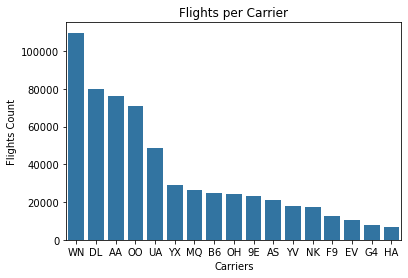

In [12]:
carriers_order = flights['OP_UNIQUE_CARRIER'].value_counts().index    # Getting an order variable to plot with it
sns.countplot(data = flights, x="OP_UNIQUE_CARRIER", order=carriers_order, color = base_color);
axes_labels("Flights per Carrier", "Carriers", "Flights Count");

> The data shows a huge gap between Southwest Airline and Delta Airline, the second in line.
> Next, we can look for the performance and its correlation with increasing the number of flights via certain airlines.

#### Distances distribution

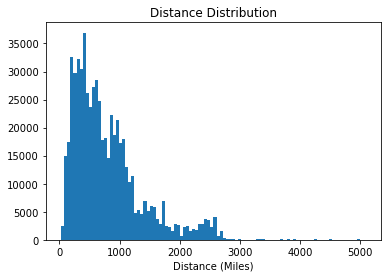

In [28]:
plt.hist(flights['DISTANCE'], bins = 100);    # Histogram of Distances distribution
axes_labels("Distance Distribution", "Distance (Miles)", "");

> Shows a skewness in the right direction, with 75 percentile of 1037 miles.

#### Delays Distribution

> Let's first check the rate of arriving later than intended. i.e. arrival delay

In [44]:
flights[flights['ARR_DELAY_NEW'] > 0].shape[0]/flights.shape[0]

0.26611684278813064

> Average delay time

In [46]:
flights[flights['ARR_DELAY_NEW'] > 0]['ARR_DELAY_NEW'].mean()

35.79276720804331

> Returning to the description of data that was done before, 50 percentile of ARR_DELAY_NEW is actually 0, let's see if the remaining values are worth diving deeper into first.

> Outliers shows dominance over the distribution, let's see if we can fix that.

In [47]:
flights[flights['ARR_DELAY_NEW'] > 0]['ARR_DELAY_NEW'].nunique()    # Checking number of unique values

938

In [48]:
flights[flights['ARR_DELAY_NEW'] > 0]['ARR_DELAY_NEW'].value_counts()     # Checking number of repetition of each value

1.0       8735
2.0       8086
3.0       7676
4.0       7050
5.0       6546
          ... 
2536.0       1
834.0        1
891.0        1
816.0        1
922.0        1
Name: ARR_DELAY_NEW, Length: 938, dtype: int64

> As expected, outliers spreading across the larger range of values, let's get rid of values that doesn't get repeated

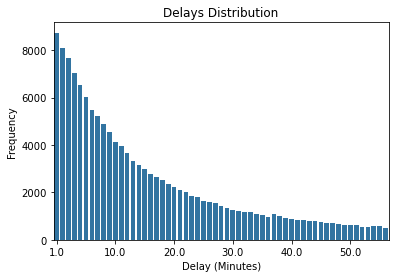

In [74]:
arr_delays_filtered = flights[flights['ARR_DELAY_NEW'] > 0]['ARR_DELAY_NEW'].value_counts()    # Storing a series of value counts
arr_delays_filtered = arr_delays_filtered[arr_delays_filtered.values > 500];    # Keeping only values repeated > 500 times
arr_delays_filtered = arr_delays_filtered.reset_index()    # Transforming into a data frame
sns.barplot(data = arr_delays_filtered, x = 'index', y = 'ARR_DELAY_NEW', color=base_color);
plt.xticks([0, 10, 20, 30, 40, 50], arr_delays_filtered['index'][[0, 9, 19, 29, 39, 50]]);    # Set custom xticks for enhanced visuals
axes_labels("Delays Distribution", "Delay (Minutes)", "Frequency");

> Seems better

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Airlines Performances

> Let's first add a new variable to the dataframe

In [14]:
flights['TOTAL_DELAY'] = flights['DEP_DELAY_NEW'] + flights['ARR_DELAY_NEW']    # New variable representing total delay

> Now a plot of distribution of delays against the different airlines on a violin plot

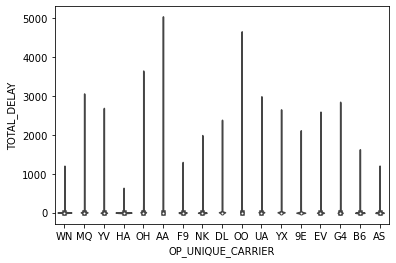

In [15]:
sns.violinplot(data = flights, x = 'OP_UNIQUE_CARRIER', y = 'TOTAL_DELAY');

> Outliers are causing a disaster here, let's see if we can work with a 99 confidence interval, to get rid of those outliers.

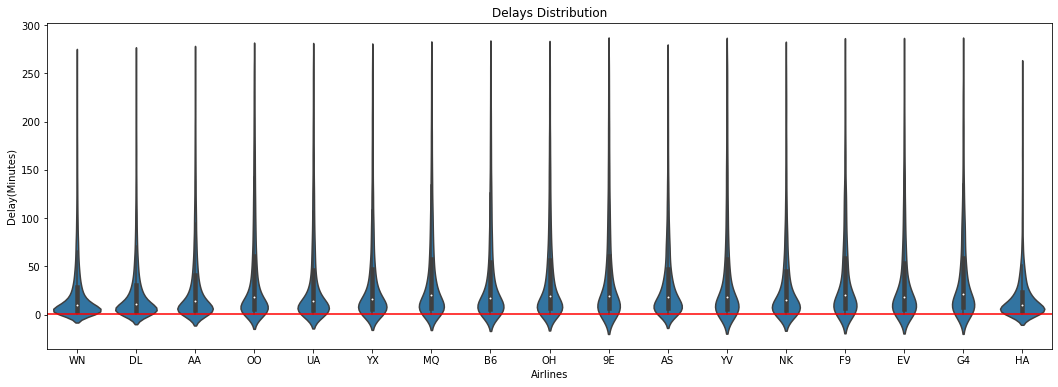

In [16]:
upper_limit = flights['TOTAL_DELAY'].mean() + 3*flights['TOTAL_DELAY'].std()    # mean + 3*std , Confidence interval of 99%
lower_limit = flights['TOTAL_DELAY'].mean() - 3*flights['TOTAL_DELAY'].std()    # mean - 3*std
# Getting the 99% confidence interval
confidence_interval_flights = flights[((flights['TOTAL_DELAY'] > lower_limit) & (flights['TOTAL_DELAY'] < upper_limit) & (flights['TOTAL_DELAY'] != 0))]
sns.violinplot(data = confidence_interval_flights, x = 'OP_UNIQUE_CARRIER', y = 'TOTAL_DELAY', color= base_color, order= carriers_order);
plt.gcf().set_size_inches((18,6));    # Modifying figure size
axes_labels('Delays Distribution', 'Airlines', 'Delay(Minutes)');
plt.gca().axhline(y= confidence_interval_flights['TOTAL_DELAY'].min(), color='red');   # Adding a horizontal line to show the minimum non zero delay

> I can see a smaller variance in delays when it comes to airlines with higher number of flights, that is WN for example has most of its delays around the minimum non-zero delay value.

> However, it's not an extensive relationship between the two variables, as seen in the violin plot, Airlines like DL and HA show less variance if compared to their counterparts, however their counterparts do have more flights.

#### Cancellation rate against Airline

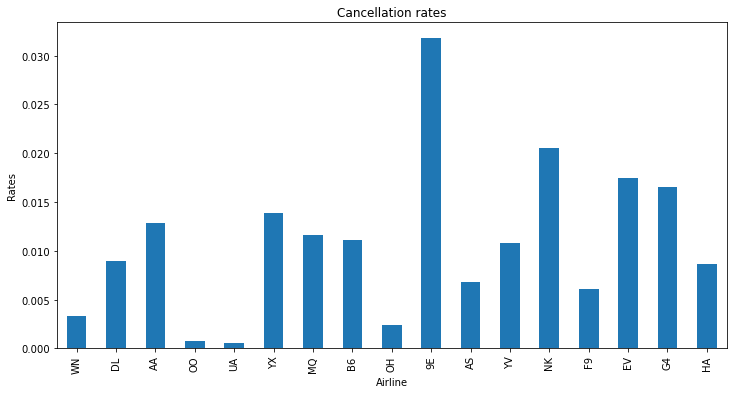

In [17]:
cancellation_rates = flights.groupby('OP_UNIQUE_CARRIER')['CANCELLED'].mean()    # Grouping by Airline
cancellation_rates.index = carriers_order    # Ordering the list like the previous plots to be more intuitive
cancellation_rates.plot(kind='bar');    # Bar plot
axes_labels('Cancellation rates', 'Airline', 'Rates');
plt.gcf().set_size_inches((12,6));

> Keeping the same order as before, we can see indeed the cancellation rate increases when observing airlines with less flights, but again the trend isn't conclusive, F9 and AS airlines could be used to prove a counter conclusion.

> One last thing we could check, the taxiing time.

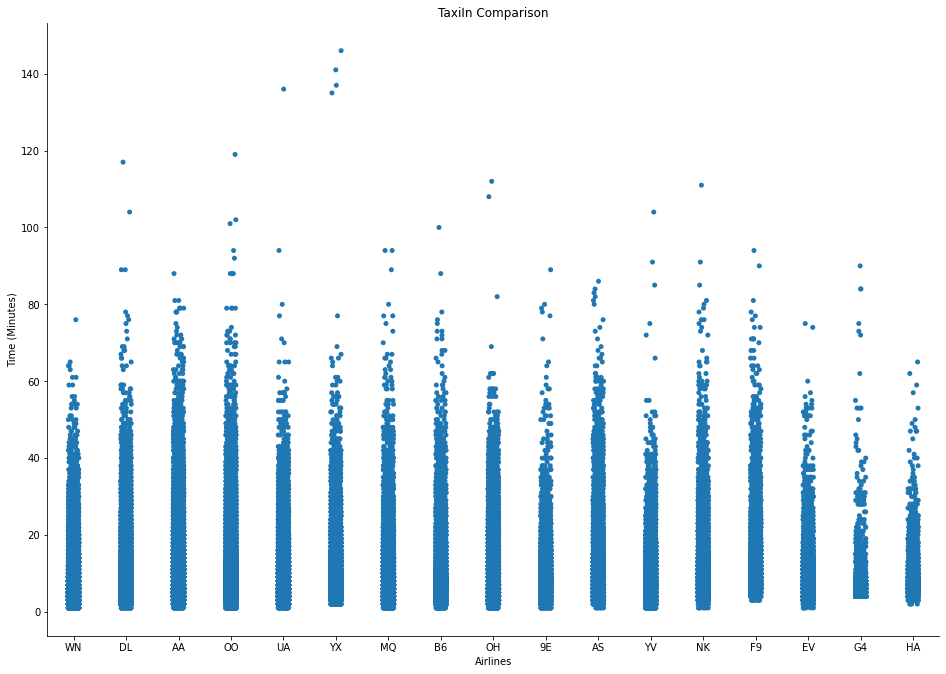

In [18]:
sns.catplot(data = flights, x = 'OP_UNIQUE_CARRIER', y = 'TAXI_IN', color = base_color, order = carriers_order);
plt.gcf().set_size_inches((15, 10));
axes_labels("TaxiIn Comparison", "Airlines", "Time (Minutes)");

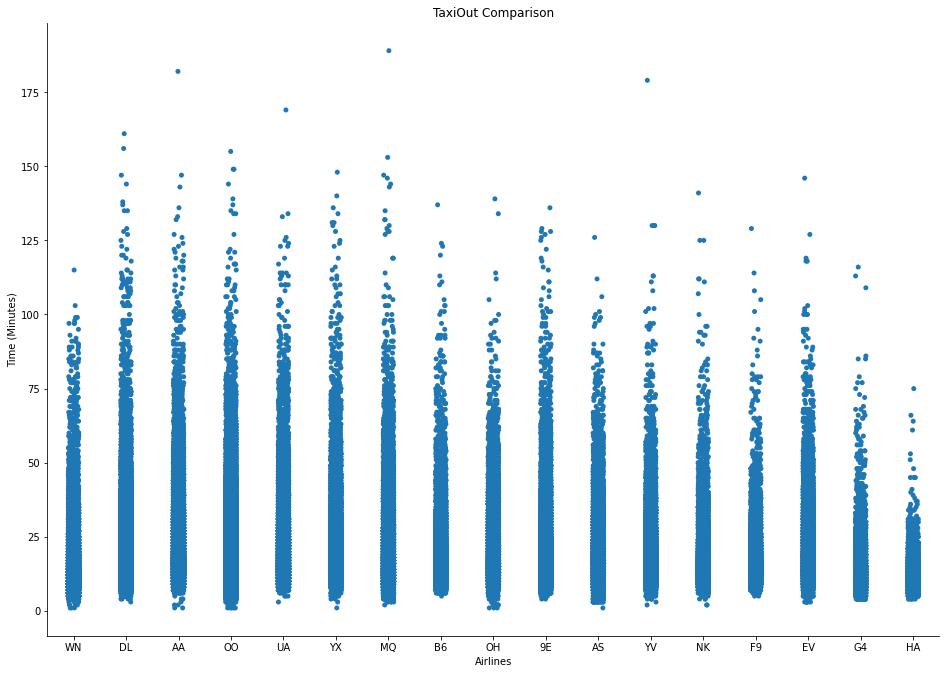

In [19]:
sns.catplot(data = flights, x = 'OP_UNIQUE_CARRIER', y = 'TAXI_OUT', color = base_color, order = carriers_order);
plt.gcf().set_size_inches((15, 10));
axes_labels("TaxiOut Comparison", "Airlines", "Time (Minutes)");

## Multivariate Exploration

> Let's see if indeed area of operation for each airline, does affect the number of flights.

In [20]:
flights['ORIGIN'].unique()    # Checking unique values in ORIGIN series

array(['ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PNS', 'PVD',
       'PWM', 'RDU', 'RIC', 'RNO', 'ROC', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'TPA',
       'TUL', 'TUS', 'ABQ', 'ALB', 'AMA', 'ATL', 'AUS', 'DAL', 'MSY',
       'OAK', 'OGG', 'OKC', 'OMA', 'BDL', 'BHM', 'BNA', 'BOI', 'BOS',
       'BUF', 'BUR', 'BWI', 'CHS', 'CLE', 'CLT', 'CMH', 'CRP', 'CVG',
       'DCA', 'DEN', 'DSM', 'DTW', 'ECP', 'ELP', 'FLL', 'GEG', 'GRR',
       'GSP', 'HNL', 'HOU', 'HRL', 'IAD', 'ICT', 'IND', 'ISP', 'ITO',
       'JAX', 'KOA', 'LAS', 'LAX', 'LBB', 'LGA', 'LGB', 'LIH', 'LIT',
       'MAF', 'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MKE', 'MSP', 'DFW',
       'DLH', 'ORD', 'BRO', 'IAH', 'JLN', 'LEX', 'GGG', 'JFK', 'BTR',
       'MIA', 'CHO', 'CID', 'CMI', 'SCE', 'ILM', 'FNT', 'MHK', 'DAY',
       'LAW', 'SGF', 'SPI', 'SHV', 'COS', 'ATW', 'FSM', 'EVV', 'GRK',
       'MQT', 'DBQ', 'EWR', 'MDT', 'SYR', 'ABE', 'FAR', 'CLL', 'GPT',
       'TYR', 'XNA',

> As we can see a 351 city is fairly large number to do a comparison, we will take a random city as a sample

In [21]:
origin_sample = np.random.choice(flights['ORIGIN'].unique(), size=10, replace=False)    # Generate a random sample of cities from ORIGIN series
origin_sample

array(['AVL', 'BOS', 'CKB', 'BOI', 'VLD', 'CAK', 'CHO', 'LWS', 'ALO',
       'PIB'], dtype=object)

In [22]:
flights_sample = flights[flights['ORIGIN'].isin(origin_sample)]
flights_sample

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,CANCELLED,DISTANCE,TOTAL_DELAY
2963,WN,BOI,DEN,0.0,15.0,6.0,0.0,0.0,649.0,0.0
2964,WN,BOI,DEN,0.0,6.0,5.0,0.0,0.0,649.0,0.0
2965,WN,BOI,GEG,0.0,7.0,3.0,0.0,0.0,287.0,0.0
2966,WN,BOI,GEG,0.0,11.0,4.0,0.0,0.0,287.0,0.0
2967,WN,BOI,LAS,0.0,8.0,5.0,0.0,0.0,519.0,0.0
...,...,...,...,...,...,...,...,...,...,...
606995,9E,BOS,RDU,0.0,20.0,6.0,0.0,0.0,612.0,0.0
606996,9E,BOS,RDU,1.0,21.0,3.0,0.0,0.0,612.0,1.0
606997,9E,BOS,RDU,0.0,28.0,4.0,0.0,0.0,612.0,0.0
606998,9E,BOS,RDU,24.0,17.0,4.0,1.0,0.0,612.0,25.0


In [75]:
flights_count = flights_sample.groupby(['ORIGIN', 'OP_UNIQUE_CARRIER']).count()['DEST'].to_frame()    # Grouping and transforming into a dataframe
flights_count.reset_index(inplace=True)
flights_count.head()

,ORIGIN,OP_UNIQUE_CARRIER,DEST
0,ALO,MQ,59
1,AVL,9E,173
2,AVL,DL,25
3,AVL,EV,5
4,AVL,G4,202


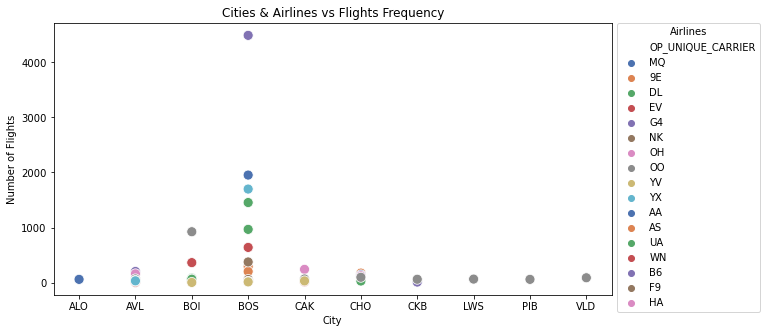

In [24]:
sns.scatterplot(data=flights_count, x = 'ORIGIN', y = 'DEST', hue ='OP_UNIQUE_CARRIER', palette='deep', s=100);
axes_labels("Cities & Airlines vs Flights Frequency", "City", "Number of Flights");
plt.gcf().set_size_inches((10, 5));
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Airlines");

> Indeed location provides a large statistical and practical significance.

#### Let's check if number of flights per airline is affected by distance

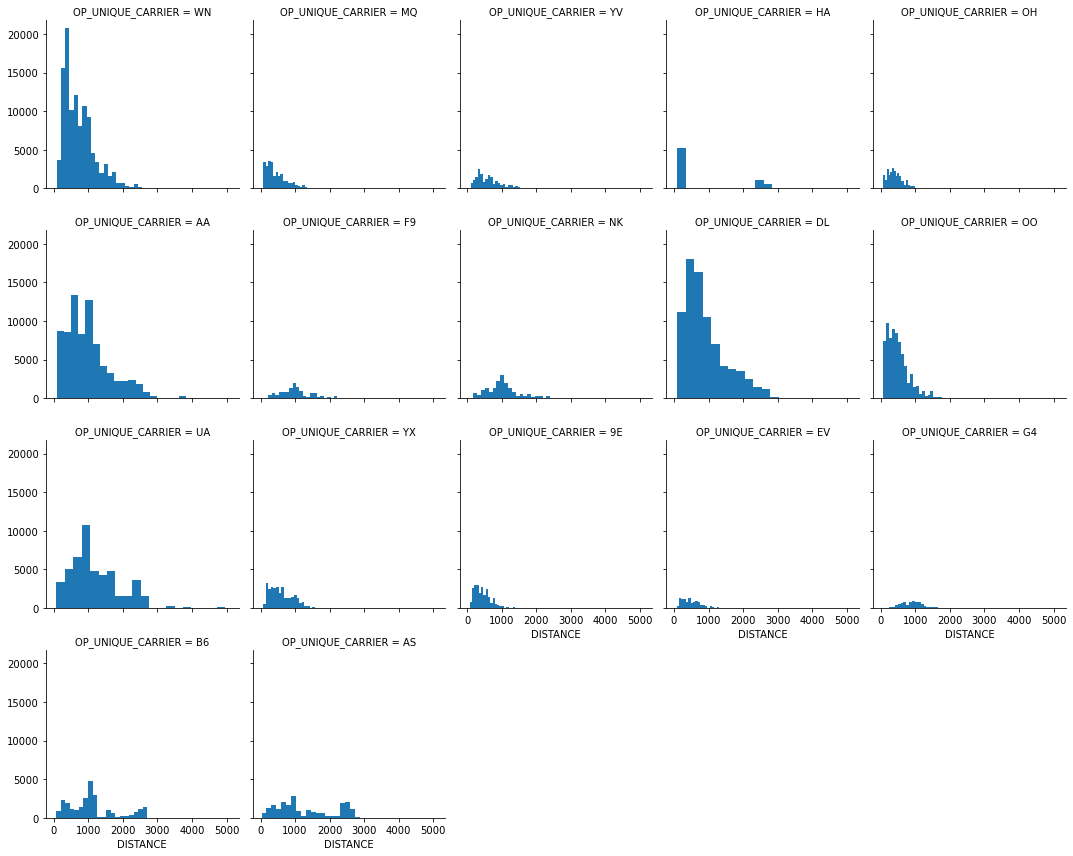

In [88]:
g = sns.FacetGrid(data = flights, col = 'OP_UNIQUE_CARRIER', col_wrap = 5, margin_titles=True)
g.map(plt.hist, 'DISTANCE', bins=20);

> The plots grid show that only few airlines have a considerable number of flights above 1000 miles, this means, these few airlines share this number of flights, which is -as concluded before- is arount 25% of the total number of flights